In [214]:
import pydotplus
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.externals.six import StringIO 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt

### Carregando o Dataset

In [216]:
df = pd.read_csv('../dataset/pulsar_stars.csv')

### Normalizando o Dataset

In [194]:
df = (df-df.min())/(df.max()-df.min())

### Balanceando as classes
* Estrela Não-Pulsar: 
* Estrela Pulsar: 1639


In [195]:
not_stars = df[df['target_class'] == 0].sample(1639)
stars = df[df['target_class'] == 1]

In [196]:
X = pd.concat([not_stars.drop(['target_class'], axis=1), stars.drop(['target_class'], axis=1)])
y = pd.concat([not_stars[['target_class']], stars[['target_class']]])

df = pd.concat([stars, not_stars])

### Rodando os classificadores
- Variando o conjunto de teste entre 1% até 99%

In [197]:
acc_knn  = []
rec_knn  = []
pre_knn  = []
acc_tree = []
rec_tree = []
pre_tree = []
counter  = []

for i in np.arange(1,100,2):
    test_size = i/100
    counter.append(test_size)
    
    #Divide em train e validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    #Declara classificadores
    decision_tree = tree.DecisionTreeClassifier()
    knn = KNeighborsClassifier(3) # k = 3

    #Treina knn
    knn.fit(X_train, y_train)

    #Treina decision_tree
    decision_tree.fit(X_train, y_train)

    #Predictions knn
    predictions_knn = knn.predict(X_test)

    #Predictions decision tree
    predictions_tree = decision_tree.predict(X_test)


    acc_knn.append(metrics.accuracy_score(y_test, predictions_knn))
    acc_tree.append(metrics.accuracy_score(y_test, predictions_tree))
    rec_knn.append(metrics.recall_score(y_test, predictions_knn))
    rec_tree.append(metrics.recall_score(y_test, predictions_tree))
    pre_knn.append(metrics.precision_score(y_test, predictions_knn))
    pre_tree.append(metrics.precision_score(y_test, predictions_tree))



/Users/viniciuslucena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### Plotando gráfico Acurácia x Tamanho Conjunto Teste

**Acurácia x Tamanho do Conjunto de Teste**

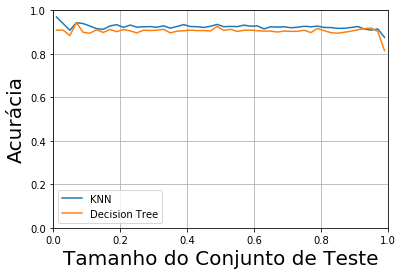

In [212]:
plt.plot(counter, acc_knn)
plt.plot(counter, acc_tree)

plt.ylabel("Acurácia", fontsize=(20))
plt.xlabel("Tamanho do Conjunto de Teste", fontsize=(20))
plt.legend(["KNN", "Decision Tree"])
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.savefig('../acuracia_x_testsize.png', dpi=300)
plt.show()

**Recall x Tamanho do Conjunto de Teste**

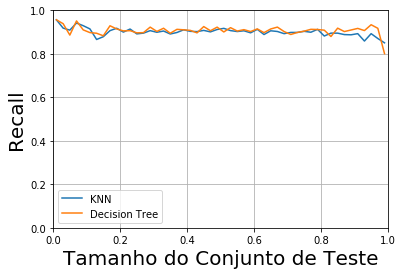

In [210]:
plt.plot(counter, rec_knn)
plt.plot(counter, rec_tree)

plt.ylabel("Recall", fontsize=(20))
plt.xlabel("Tamanho do Conjunto de Teste", fontsize=(20))
plt.legend(["KNN", "Decision Tree"])
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.savefig('../recall_x_testsize.png', dpi=300)
plt.show()

**Precision x Tamanho do Conjunto de Teste**

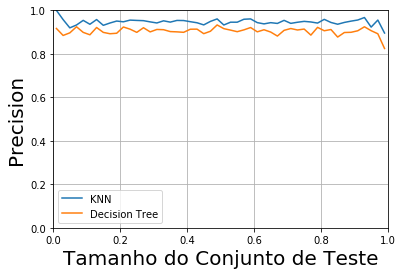

In [211]:
plt.plot(counter, pre_knn)
plt.plot(counter, pre_tree)

plt.ylabel("Precision", fontsize=(20))
plt.xlabel("Tamanho do Conjunto de Teste", fontsize=(20))
plt.legend(["KNN", "Decision Tree"])
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.savefig('../precision_x_testsize.png', dpi=300)
plt.show()

### Matriz de Confusão

**Algoritmo KNN**

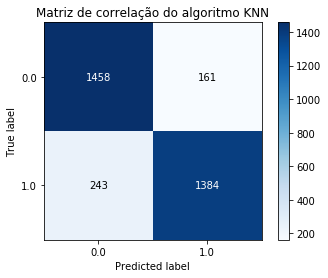

In [200]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_knn)
plt.title('Matriz de correlação do algoritmo KNN')
plt.savefig('../confusion_matrix_knn', dpi=300)

**Árvore de Decisão**

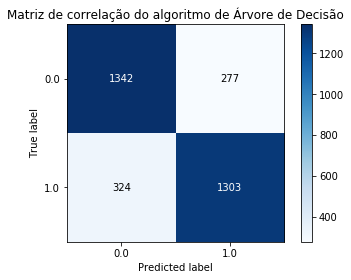

In [201]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_tree)
plt.title('Matriz de correlação do algoritmo de Árvore de Decisão')
plt.savefig('../confusion_matrix_knn', dpi=300)

### Plot da Árvore de Decisão
    exportando para PDF

In [202]:
#Salva PDF da arvore gerada (requer pydotplus e graphviz)
dot_data = StringIO() 
tree.export_graphviz(decision_tree, 
                     out_file=dot_data,
                     feature_names=list(X_train),
                     class_names=['pulsar_star', 'not_star'],
                     filled=True, rounded=True,
                     impurity=False) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("tree.pdf") 

---

## Análise Exploratória

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

### Matriz de Correlação

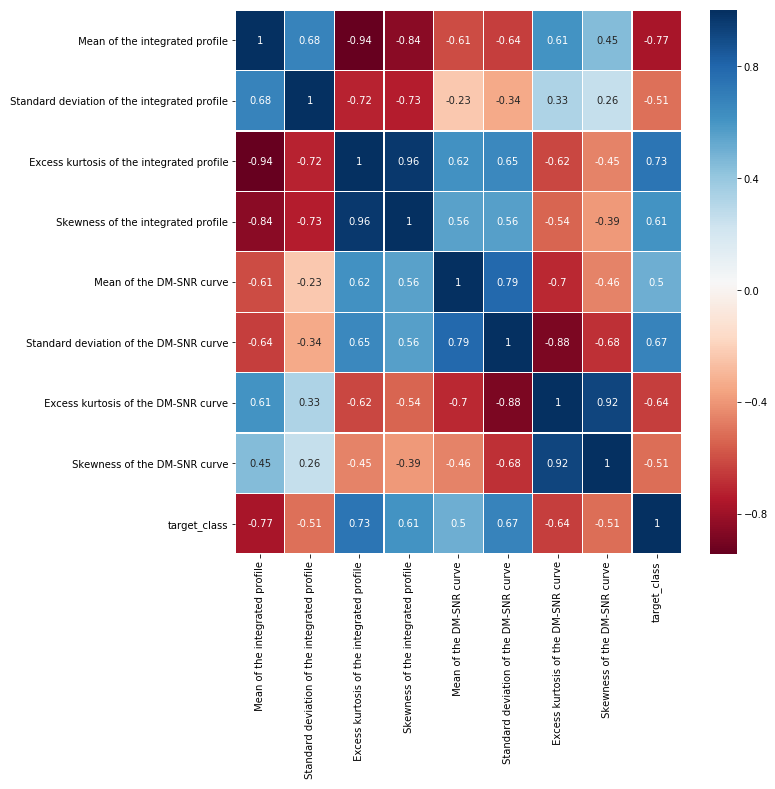

In [204]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), linecolor="white", annot=True, linewidths=0.1, cmap="RdBu")
plt.savefig('../correlacao.png', dpi=300)


---

### Scatter plot

In [ ]:

for i in list(df):
    for j in list(df):        
        plt.scatter(x=df[i],
                    y=df[j], 
                    c=df['target_class'],
                    alpha=0.05)

        plt.grid(False)

        plt.xlabel(i)
        plt.ylabel(j)
        
        i_aux = i.replace(" ", "_")
        j_aux = j.replace(" ", "_")
        
        #plt.savefig('scatterplot/' + i_aux + j_aux + '.png', dpi=300)